<a href="https://colab.research.google.com/github/Suetam016/Pandas-Data-Science-Tasks/blob/master/Analise_explorat%C3%B3ria_agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analise exploratória Angents**




In [5]:
import pandas as pd
import getpass
import numpy as np

user = str(getpass.getuser()).lower()
    
    
path= '/content/bases.xlsx'
    
    
base_cadastro = pd.read_excel(path,sheet_name = 'base cadastro')
base_antiga = pd.read_excel(path, sheet_name = 'base antiga')
mosaic = pd.read_excel(path, sheet_name = 'mosaic')
mosaic2 = pd.read_excel(path, sheet_name = 'mosaic_2')

**Começando por Base_Cadastro**


In [6]:
base_cadastro

,Protocolo,Cod_ramo,Cod_produto,Cod_plano,Cod_Convenio,Apolice,CPF,Non_Taken,Dt_nasc,Inicio_vigencia_apolice_ajustado,Dt_protocolo_ajustado,Dt_emissao_ajustado,Dt_baixa_min_ajustado,Cancelamento_apolice_ajustado,Produto,Plano,Status,Motivo_cancelamento,TipoBeneficio,LSLAB,Sexo,Estado_civil,Ocupacao,Cidade,Estado,CanalMetlife,CanalVenda,Last_CNPJ_favorecido,Last_Nome_favorecido,First_Premio_Mensalizado,First_Capital_basica,First_Premio_Mensalizado_IPCA,First_Capital_basica_IPCA,First_Broker,First_Broker_CNPJ,cnpjla,cnpjlu,Agencia,la,lu,consultorajustado,cnpjla_Venda,cnpjlu_Venda,Agencia_Venda,la_Venda,lu_Venda,dt_cad_Ajustado,dt_descad_Ajustado,FormaPGTO_Inicial,FormaPGTO_Final,FormaPGTO_Inicial_Detalhe,FormaPGTO_Final_Detalhe,IdadeContratacao,TempoMetlifeConsultorVenda,ProdutoResumido,RangeAgentTenureSale,RangeFirstPremium,RangeAgeAtSale,Motivo_cancelamento_Resumo,PolicyCancel_AgentTenure,RangePolicyCancel_AgentTenure,FirstPaymentFrequency
0,S180004090,91,10787,9191,1354434.0,31119,2659287104,0,1988-01-20,2018-07-01,2018-07-01,2018-07-01,2018-07-01,NaT,VIDA TOTAL Canal Consultor 01,VT 65+25,A,NaN,NaN,NaN,F,Solteiro,NaN,Brasília,DF,Agents,CanalA,4.216169e+13,Fundacao Escola Nacional de Segs FUNENS,3.017300e+02,69133.08,333.43,76396.84,TALENTOS CORRETORA DE SEGUROS EIRELI,3.017877e+13,2.771108e+13,2.847544e+13,BSB,Luan Coelho,Pamela Morais,Ana Crespo,2.780474e+13,2.847544e+13,BSB,João Minsoni,Pamela Morais,2018-06-01,2019-03-01,BOLETO,DEBITO EM C/C,BOLETO,Banco do Brasil S.A.,30.0,2.0,WL,1) 0-6 months,2) 301-500,1) 0-30,NaN,NaN,N/I,1) Monthly
1,S190000925,91,10787,9183,1436502.0,36197,23500994822,0,1984-08-01,2019-02-01,2019-02-01,2019-01-01,2019-01-01,2019-06-01,VIDA TOTAL Canal Consultor 01,VT 10,C,Falta de pagamento,NaN,NaN,M,Solteiro,NaN,Sao Paulo,SP,Agents,CanalA,3.028473e+13,FPS CONSULTORIA E CORRETORA DE SEGUROS L,4.327400e+02,125000.00,471.43,136177.29,FPS CONSULTORIA E CORRETORA DE SEGUROS L,3.028473e+13,2.649559e+13,2.825700e+13,SP 2,Adriana Prado,Renata Voivodic,Fabiane Santos,2.649559e+13,2.825700e+13,SP 2,Adriana Prado,Renata Voivodic,2018-05-01,2019-02-01,CARTAO DE CREDITO,CARTAO DE CREDITO,Mastercard,Mastercard,34.0,9.0,WL,2) 7-12 months,2) 301-500,2) 31-40,Involuntary,14.0,3) Y2,1) Monthly
2,S190001047,91,10787,9183,1437845.0,36296,23500994822,1,1984-08-01,2019-02-01,2019-02-01,2019-01-01,NaT,2019-05-01,VIDA TOTAL Canal Consultor 01,VT 10,C,Falta de pagamento,NaN,NaN,M,Solteiro,NaN,Sao Paulo,SP,Agents,CanalA,3.028473e+13,FPS CONSULTORIA E CORRETORA DE SEGUROS L,4.154300e+02,120000.00,452.58,130730.20,FPS CONSULTORIA E CORRETORA DE SEGUROS L,3.028473e+13,2.649559e+13,2.825700e+13,SP 2,Adriana Prado,Renata Voivodic,Fabiane Santos,2.649559e+13,2.825700e+13,SP 2,Adriana Prado,Renata Voivodic,2018-05-01,2019-02-01,CARTAO DE CREDITO,CARTAO DE CREDITO,Mastercard,Mastercard,34.0,9.0,WL,2) 7-12 months,2) 301-500,2) 31-40,Involuntary,13.0,3) Y2,1) Monthly
3,S190001045,91,10787,9183,1437831.0,36282,23500994822,0,1984-08-01,2019-02-01,2019-02-01,2019-01-01,2019-01-01,2019-06-01,VIDA TOTAL Canal Consultor 01,VT 10,C,Falta de pagamento,NaN,NaN,M,Solteiro,NaN,Sao Paulo,SP,Agents,CanalA,4.216169e+13,Fundacao Escola Nacional de Segs FUNENS,3.981200e+02,115000.00,433.72,125283.11,FPS CONSULTORIA E CORRETORA DE SEGUROS L,3.028473e+13,2.649559e+13,2.825700e+13,SP 2,Adriana Prado,Renata Voivodic,Fabiane Santos,2.649559e+13,2.825700e+13,SP 2,Adriana Prado,Renata Voivodic,2018-05-01,2019-02-01,CARTAO DE CREDITO,CARTAO DE CREDITO,Mastercard,Mastercard,34.0,9.0,WL,2) 7-12 months,2) 301-500,2) 31-40,Involuntary,14.0,3) Y2,1) Monthly
4,S200017551,91,200003,13,68902.0,68902,1679381008,0,1990-06-15,2020-11-01,2020-11-01,2020-11-01,2020-11-01,2021-05-01,Vida Total,VT 65,C,Falta de pagamento,NaN,NaN,M,Amasiado,ADMINISTRADOR DE EMPRESA,Curitiba,PR,Agents,CanalA,3.837656e+13,JTF CORRETORA DE SEGUROS DE VIDA LTDA,2.932300e+02,70000.00,300.58,71755.35,JTF CORRETORA DE SEGUROS DE VIDA LTDA,3.837656e+13,2.777271e+13,2.853743e+13,POA,Rodrigo Silveira

In [7]:
bc = base_cadastro.copy()

**Formatação**


In [15]:
x = bc.FirstPaymentFrequency.str.split(")",expand=True)
x[0].unique(), x[1].unique()



(array(['1', '5', '3', '2'], dtype=object),
 array([' Monthly', ' Yearly', ' Quarterly', ' Bimonthly'], dtype=object))

In [16]:
x = bc.RangePolicyCancel_AgentTenure.str.split(")",expand=True)
x[0].unique(), x[1].unique()

(array(['N/I', '3', '2', '4', '1'], dtype=object),
 array([None, ' Y2', ' 7-12 months', ' Y3+', ' 0-6 months'], dtype=object))

In [17]:
x = bc.RangeAgeAtSale.str.split(")",expand=True)
x[0].unique(), x[1].unique()

(array(['1', '2', '3', '4', '5'], dtype=object),
 array([' 0-30', ' 31-40', ' 41-50', ' 51-60', ' 60+'], dtype=object))

In [18]:
x = bc.RangeFirstPremium.str.split(")",expand=True)
x[0].unique(), x[1].unique()

(array(['2', '1', '4', '3', '5', 'N/I'], dtype=object),
 array([' 301-500', ' 0-300', ' 701-1000', ' 501-700', ' 1000+', None],
       dtype=object))

Criando colunas pra guardar esses valores, mudei pra quando é N/I ser 0



In [80]:
bc['#FirstPaymentFrequency'] = bc.FirstPaymentFrequency.str.split(")",expand=True)[0]
bc['#RangePolicyCancel_AgentTenure'] = bc.RangePolicyCancel_AgentTenure.str.split(")",expand=True)[0]
bc['#RangeAgeAtSale'] = bc.RangeAgeAtSale.str.split(")",expand=True)[0]
bc['#RangeFirstPremium'] = bc.RangeFirstPremium.str.split(")",expand=True)[0]
bc['#FirstPaymentFrequency'] = np.where(bc['#FirstPaymentFrequency'] =='N/I', 0, bc['#FirstPaymentFrequency'])
bc['#RangePolicyCancel_AgentTenure'] = np.where(bc['#RangePolicyCancel_AgentTenure'] =='N/I', 0, bc['#RangePolicyCancel_AgentTenure'])
bc['#RangeAgeAtSale'] = np.where(bc['#RangeAgeAtSale'] =='N/I', 0, bc['#RangeAgeAtSale'])
bc['#RangeFirstPremium'] = np.where(bc['#RangeFirstPremium'] =='N/I', 0, bc['#RangeFirstPremium'])
bc.head(1)

,Protocolo,Cod_ramo,Cod_produto,Cod_plano,Cod_Convenio,Apolice,CPF,Non_Taken,Dt_nasc,Inicio_vigencia_apolice_ajustado,Dt_protocolo_ajustado,Dt_emissao_ajustado,Dt_baixa_min_ajustado,Cancelamento_apolice_ajustado,Produto,Plano,Status,Motivo_cancelamento,Sexo,Estado_civil,Ocupacao,Cidade,Estado,CanalMetlife,CanalVenda,Last_CNPJ_favorecido,Last_Nome_favorecido,First_Premio_Mensalizado,First_Capital_basica,First_Premio_Mensalizado_IPCA,First_Capital_basica_IPCA,First_Broker,First_Broker_CNPJ,cnpjla,cnpjlu,Agencia,la,lu,consultorajustado,cnpjla_Venda,cnpjlu_Venda,Agencia_Venda,la_Venda,lu_Venda,dt_cad_Ajustado,dt_descad_Ajustado,FormaPGTO_Inicial,FormaPGTO_Final,FormaPGTO_Inicial_Detalhe,FormaPGTO_Final_Detalhe,IdadeContratacao,TempoMetlifeConsultorVenda,ProdutoResumido,RangeAgentTenureSale,RangeFirstPremium,RangeAgeAtSale,Motivo_cancelamento_Resumo,PolicyCancel_AgentTenure,RangePolicyCancel_AgentTenure,FirstPaymentFrequency,#FirstPaymentFrequency,#RangePolicyCancel_AgentTenure,#RangeAgeAtSale,#RangeFirstPremium
0,S180004090,91,10787,9191,1354434.0,31119,2659287104,0,1988-01-20,2018-07-01,2018-07-01,2018-07-01,2018-07-01,NaT,VIDA TOTAL Canal Consultor 01,VT 65+25,A,NaN,F,Solteiro,NaN,Brasília,DF,Agents,CanalA,4.216169e+13,Fundacao Escola Nacional de Segs FUNENS,301.73,69133.08,333.43,76396.84,TALENTOS CORRETORA DE SEGUROS EIRELI,3.017877e+13,2.771108e+13,2.847544e+13,BSB,Luan Coelho,Pamela Morais,Ana Crespo,2.780474e+13,2.847544e+13,BSB,João Minsoni,Pamela Morais,2018-06-01,2019-03-01,BOLETO,DEBITO EM C/C,BOLETO,Banco do Brasil S.A.,30.0,2.0,WL,1) 0-6 months,2) 301-500,1) 0-30,NaN,NaN,N/I,1) Monthly,1,0,1,2


**Checando null**

In [43]:
null = bc.isna().sum()
null = pd.DataFrame(null)
null.sort_values(by =[0],axis=0,ascending = False, inplace = True )
null.head(30)

,0
TipoBeneficio,70922
LSLAB,70832
PolicyCancel_AgentTenure,48434
dt_descad_Ajustado,44482
Motivo_cancelamento,40934
Motivo_cancelamento_Resumo,40933
Cancelamento_apolice_ajustado,40933
Ocupacao,37548
FormaPGTO_Inicial_Detalhe,32609
FormaPGTO_Final_Detalhe,30300


Essa base tem (70922,62) lin,col.
vou dropar TipoBeneficio e LSLAB já que eles tem quase todos os registros NaN


In [ ]:
del bc['TipoBeneficio'],bc['LSLAB']


In [51]:
null = bc.isna().sum()
null = pd.DataFrame(null)
null.sort_values(by =[0],axis=0,ascending = False, inplace = True )
null.head(30)

,0
PolicyCancel_AgentTenure,48434
dt_descad_Ajustado,44482
Motivo_cancelamento,40934
Motivo_cancelamento_Resumo,40933
Cancelamento_apolice_ajustado,40933
Ocupacao,37548
FormaPGTO_Inicial_Detalhe,32609
FormaPGTO_Final_Detalhe,30300
lu_Venda,11107
Agencia_Venda,11107


Vou checar os que tem Estado_civil, Cidade e esses 11 que aparecem no fim dos NaNs. 
As colunas de cancelamento fazem sentido ter bastante NaN, já que se a pessoa esta ativa não tem dados de cancelamento. As outras colunas eu não conheço tanto pra opinar sobre sua remoção, então deixei.

In [81]:
estado_civil_nan = bc.loc[bc['Estado_civil'].isna()]
print(estado_civil_nan['Ocupacao'].unique())
estado_civil_nan.head(5)

[nan]


,Protocolo,Cod_ramo,Cod_produto,Cod_plano,Cod_Convenio,Apolice,CPF,Non_Taken,Dt_nasc,Inicio_vigencia_apolice_ajustado,Dt_protocolo_ajustado,Dt_emissao_ajustado,Dt_baixa_min_ajustado,Cancelamento_apolice_ajustado,Produto,Plano,Status,Motivo_cancelamento,Sexo,Estado_civil,Ocupacao,Cidade,Estado,CanalMetlife,CanalVenda,Last_CNPJ_favorecido,Last_Nome_favorecido,First_Premio_Mensalizado,First_Capital_basica,First_Premio_Mensalizado_IPCA,First_Capital_basica_IPCA,First_Broker,First_Broker_CNPJ,cnpjla,cnpjlu,Agencia,la,lu,consultorajustado,cnpjla_Venda,cnpjlu_Venda,Agencia_Venda,la_Venda,lu_Venda,dt_cad_Ajustado,dt_descad_Ajustado,FormaPGTO_Inicial,FormaPGTO_Final,FormaPGTO_Inicial_Detalhe,FormaPGTO_Final_Detalhe,IdadeContratacao,TempoMetlifeConsultorVenda,ProdutoResumido,RangeAgentTenureSale,RangeFirstPremium,RangeAgeAtSale,Motivo_cancelamento_Resumo,PolicyCancel_AgentTenure,RangePolicyCancel_AgentTenure,FirstPaymentFrequency,#FirstPaymentFrequency,#RangePolicyCancel_AgentTenure,#RangeAgeAtSale,#RangeFirstPremium
158,S130000539,91,10382,6407,899865.0,15748,786353813,0,1959-04-14,2013-03-01,2013-03-01,2013-03-01,2013-04-01,2018-03-01,VIDA TOTAL,VT 100,C,Falta de pagamento,M,NaN,NaN,Guarulhoes,SP,Agents,Consultores,4.216169e+13,Fundacao Escola Nacional de Segs FUNENS,2.581604e+07,67859.76,393.71,103491.12,Fundacao Escola Nacional de Segs FUNENS,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,NaT,NaT,DEBITO EM C/C,DEBITO EM C/C,Banco Santander (Brasil) S.A.,Banco Santander (Brasil) S.A.,53.0,NaN,WL,N/I,1) 0-300,4) 51-60,Involuntary,NaN,N/I,1) Monthly,1,0,4,1
164,S130000709,91,10382,6407,900645.0,15835,26555948191,0,1965-06-24,2013-04-01,2013-04-01,2013-04-01,2013-05-01,2015-06-01,VIDA TOTAL,VT 100,C,Falta de pagamento,M,NaN,NaN,CURITIBA,PR,Agents,Consultores,4.216169e+13,Fundacao Escola Nacional de Segs FUNENS,1.573275e+07,42112.42,238.81,63924.09,Fundacao Escola Nacional de Segs FUNENS,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,NaT,NaT,DEBITO EM C/C,DEBITO EM C/C,Itaú Unibanco S.A.,Itaú Unibanco S.A.,47.0,NaN,WL,N/I,1) 0-300,3) 41-50,Involuntary,NaN,N/I,1) Monthly,1,0,3,1
168,S140000434,91,10514,7831,913930.0,17646,25305023823,1,1975-10-28,2014-03-01,2014-02-01,2014-03-01,NaT,2014-07-01,VIDA TOTAL II,VT 100+20,C,Falta de pagamento,M,NaN,NaN,SANTO ANDRE,SP,Agents,Consultores,4.216169e+13,Fundacao Escola Nacional de Segs FUNENS,5.409143e+07,150000.00,780.60,216466.26,Fundacao Escola Nacional de Segs FUNENS,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,NaT,NaT,DEBITO EM C/C,DEBITO EM C/C,Banco Santander (Brasil) S.A.,Banco Santander (Brasil) S.A.,38.0,NaN,WL,N/I,3) 501-700,2) 31-40,Involuntary,NaN,N/I,1) Monthly,1,0,2,3
176,S130000444,91,10382,6407,900399.0,15790,62054937991,0,1966-12-30,2013-04-01,2013-03-01,2013-04-01,2013-05-01,2015-07-01,VIDA TOTAL,VT 100,C,Falta de pagamento,M,NaN,NaN,Curitiba,PR,Agents,Consultores,4.216169e+13,Fundacao Escola Nacional de Segs FUNENS,1.102649e+08,307306.87,1673.75,466473.11,Fundacao Escola Nacional de Segs FUNENS,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,NaT,NaT,DEBITO EM C/C,DEBITO EM C/C,Banco Bradesco S.A.,Banco Bradesco S.A.,46.0,NaN,WL,N/I,5) 1000+,3) 41-50,Involuntary,NaN,N/I,1) Monthly,1,0,3,5
318,S150001914,91,10515,7837,1012781.0,20967,79709605968,0,1971-12-08,2015-11-01,2015-10-01,2015-11-01,2015-12-01,NaT,VIDA SEGURA II,VS 75+05,A,NaN,F,NaN,NaN,CURITIBA,PR,Agents,Consultores,4.216169e+13,Fundacao Escola Nacional de Segs FUNENS,2.800900e+02,127092.95,354.37,160800.05,Fundacao Escola Nacional de Segs FUNENS,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,NaT,NaT,BOLETO,DEBITO EM C/C,BOLETO,Itaú Unibanco S.A.,43.0,NaN,TL,N/I,1) 0-300,3) 41-50,NaN,NaN,N/I,1) Monthly,1,0,3,1


Todos com Estado_civil NaN tem ocupação NaN também

In [69]:
cidade_nan = bc.loc[bc['Cidade'].isna()]
print(cidade_nan['Estado'].describe(include=['object','category']))
cidade_nan['Estado'].unique()
#Curiosamente a maioria não tem Estado NaN também


count     27
unique     2
top       SP
freq      24
Name: Estado, dtype: object


array(['SP', nan, 'RJ'], dtype=object)

In [63]:
#Essa linha me chamou atenção: 
y=cidade_nan.loc[[3001]]
y
#Tem muitos NaNs e o First Broker se chama NULL - FUNENSEG. 
#A Escola Nacional de Seguros - FUNENSEG. Mas pq do NULL?

,Protocolo,Cod_ramo,Cod_produto,Cod_plano,Cod_Convenio,Apolice,CPF,Non_Taken,Dt_nasc,Inicio_vigencia_apolice_ajustado,Dt_protocolo_ajustado,Dt_emissao_ajustado,Dt_baixa_min_ajustado,Cancelamento_apolice_ajustado,Produto,Plano,Status,Motivo_cancelamento,Sexo,Estado_civil,Ocupacao,Cidade,Estado,CanalMetlife,CanalVenda,Last_CNPJ_favorecido,Last_Nome_favorecido,First_Premio_Mensalizado,First_Capital_basica,First_Premio_Mensalizado_IPCA,First_Capital_basica_IPCA,First_Broker,First_Broker_CNPJ,cnpjla,cnpjlu,Agencia,la,lu,consultorajustado,cnpjla_Venda,cnpjlu_Venda,Agencia_Venda,la_Venda,lu_Venda,dt_cad_Ajustado,dt_descad_Ajustado,FormaPGTO_Inicial,FormaPGTO_Final,FormaPGTO_Inicial_Detalhe,FormaPGTO_Final_Detalhe,IdadeContratacao,TempoMetlifeConsultorVenda,ProdutoResumido,RangeAgentTenureSale,RangeFirstPremium,RangeAgeAtSale,Motivo_cancelamento_Resumo,PolicyCancel_AgentTenure,RangePolicyCancel_AgentTenure,FirstPaymentFrequency,#FirstPaymentFrequency
3001,S210005208,91,10788,9206,1861239.0,87006,13594482847,1,1975-05-19,2021-03-01,2021-03-01,2021-07-01,NaT,NaT,VIDA SEGURA Canal Consultor 01,PV 75,A,NaN,M,Amasiado,ADMINISTRADOR DE EMPRESA,NaN,SP,Agents,CanalA,4.216169e+13,NULL - FUNENSEG,0.01,65000.0,0.01,65000.0,NULL - FUNENSEG,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,2016-07-01,2016-06-01,DEBITO EM C/C,DEBITO EM C/C,NaN,NaN,46.0,61.0,TL + Pension,4) Y3+,1) 0-300,3) 41-50,NaN,NaN,N/I,1) Monthly,1


In [75]:
#Explorando os NULL - FUNENSEG da base cadastro
funenseg = bc.loc[bc['First_Broker']=='NULL - FUNENSEG']
print(funenseg.shape)
funenseg
#Tem alguns valores que parecem normais, mas muitos vem com First_Premio_Mensalizado_IPCA = 0.01
#Esses muitos tambem First_Premio_Mensalizado = 0.01 e First_Capital_basica=60000.00
#Todos tem muitos nulls em vendas, cnpj, etc. Muito Estranho.

(99, 61)


,Protocolo,Cod_ramo,Cod_produto,Cod_plano,Cod_Convenio,Apolice,CPF,Non_Taken,Dt_nasc,Inicio_vigencia_apolice_ajustado,Dt_protocolo_ajustado,Dt_emissao_ajustado,Dt_baixa_min_ajustado,Cancelamento_apolice_ajustado,Produto,Plano,Status,Motivo_cancelamento,Sexo,Estado_civil,Ocupacao,Cidade,Estado,CanalMetlife,CanalVenda,Last_CNPJ_favorecido,Last_Nome_favorecido,First_Premio_Mensalizado,First_Capital_basica,First_Premio_Mensalizado_IPCA,First_Capital_basica_IPCA,First_Broker,First_Broker_CNPJ,cnpjla,cnpjlu,Agencia,la,lu,consultorajustado,cnpjla_Venda,cnpjlu_Venda,Agencia_Venda,la_Venda,lu_Venda,dt_cad_Ajustado,dt_descad_Ajustado,FormaPGTO_Inicial,FormaPGTO_Final,FormaPGTO_Inicial_Detalhe,FormaPGTO_Final_Detalhe,IdadeContratacao,TempoMetlifeConsultorVenda,ProdutoResumido,RangeAgentTenureSale,RangeFirstPremium,RangeAgeAtSale,Motivo_cancelamento_Resumo,PolicyCancel_AgentTenure,RangePolicyCancel_AgentTenure,FirstPaymentFrequency,#FirstPaymentFrequency
224,S200011890,91,10788,9206,1798750.0,75946,3039894676,0,1976-04-25,2020-08-01,2020-08-01,2021-03-01,2021-03-01,NaT,VIDA SEGURA Canal Consultor 01,PV 75,A,NaN,M,Solteiro,CORRETORES DE IMÓVEIS,Contagem,MG,Agents,CanalA,4.216169e+13,NULL - FUNENSEG,1.000000e-02,60000.00,0.01,62580.37,NULL - FUNENSEG,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,2016-07-01,2016-06-01,DEBITO EM C/C,DEBITO EM C/C,NaN,NaN,44.0,57.0,TL + Pension,4) Y3+,1) 0-300,3) 41-50,NaN,NaN,N/I,1) Monthly,1
286,S200011206,91,10787,9186,1790930.0,74735,69910855100,0,1982-07-24,2020-08-01,2020-08-01,2021-03-01,2021-03-01,NaT,VIDA TOTAL Canal Consultor 01,VT 65,A,NaN,M,Casado,ADMINISTRADOR DE EMPRESA,Goiânia,GO,Agents,CanalA,4.216169e+13,NULL - FUNENSEG,1.000000e-02,60000.00,0.01,62580.37,NULL - FUNENSEG,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,2016-07-01,2016-06-01,DEBITO EM C/C,DEBITO EM C/C,NaN,NaN,38.0,57.0,WL,4) Y3+,1) 0-300,2) 31-40,NaN,NaN,N/I,1) Monthly,1
707,S170001332,91,10745,8748,1170308.0,24292,15155239850,0,1975-11-21,2017-03-01,2017-03-01,2017-03-01,2017-04-01,2018-11-01,VIDA SEGURA Canal A II,PV 75,C,Falta de pagamento,M,Solteiro,NaN,SAO PAULO,SP,Agents,CanalA,4.216169e+13,Fundacao Escola Nacional de Segs FUNENS,4.763200e+02,149147.00,552.06,172863.41,NULL - FUNENSEG,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,2016-07-01,2016-06-01,CARTAO DE CREDITO,CARTAO DE CREDITO,VISA,VISA,41.0,9.0,TL + Pension,2) 7-12 months,2) 301-500,3) 41-50,Involuntary,29.0,4) Y3+,1) Monthly,1
2012,S200005034,91,10787,9183,1707090.0,66169,27315094814,0,1977-02-23,2020-04-01,2020-04-01,2020-10-01,2020-10-01,2020-10-01,VIDA TOTAL Canal Consultor 01,VT 10,C,Sinistro,M,Casado,ADMINISTRADOR DE EMPRESA,São Paulo,SP,Agents,CanalA,4.216169e+13,NULL - FUNENSEG,1.000000e-02,120000.00,0.01,125070.43,NULL - FUNENSEG,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,2016-07-01,2016-06-01,DEBITO EM C/C,DEBITO EM C/C,NaN,NaN,43.0,52.0,WL,4) Y3+,1) 0-300,3) 41-50,Involuntary,52.0,4) Y3+,1) Monthly,1
3001,S210005208,91,10788,9206,1861239.0,87006,13594482847,1,1975-05-19,2021-03-01,2021-03-01,2021-07-01,NaT,NaT,VIDA SEGURA Canal Consultor 01,PV 75,A,NaN,M,Amasiado,ADMINISTRADOR DE EMPRESA,NaN,SP,Agents,CanalA,4.216169e+13,NULL - FUNENSEG,1.000000e-02,65000.00,0.01,65000.00,NULL - FUNENSEG,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,2016-07-01,2016-06-01,DEBITO EM C/C,DEBITO EM C/C,NaN,NaN,46.0,61.0,TL + Pension,4) Y3+,1) 0-300,3) 41-50,NaN,NaN,N/I,1) Monthly,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64043,NaN,91,10788,9200,1711235.0,66546,6333209864,0,1965-10-21,2020-06-01,NaT,2020-10-01,2020-11-01,2020-11-01,VIDA SEGURA Canal Consultor 01,VS 75,C,Sinistro,M,Casado,Gerente,São Paulo,SP,Agents,Consultores,4.216169e+13,NULL - FUNENSEG,1.000000e-02,60000.00,0.01,62968.

In [76]:
funenseg.describe()

,Cod_ramo,Cod_produto,Cod_plano,Cod_Convenio,Apolice,CPF,Non_Taken,Last_CNPJ_favorecido,First_Premio_Mensalizado,First_Capital_basica,First_Premio_Mensalizado_IPCA,First_Capital_basica_IPCA,First_Broker_CNPJ,cnpjla,cnpjlu,cnpjla_Venda,cnpjlu_Venda,IdadeContratacao,TempoMetlifeConsultorVenda,PolicyCancel_AgentTenure
count,99.0,99.000000,99.000000,9.900000e+01,99.000000,9.900000e+01,99.000000,9.900000e+01,9.900000e+01,99.000000,99.000000,99.000000,9.900000e+01,0.0,0.0,0.0,0.0,99.000000,80.000000,47.000000
mean,91.0,12682.494949,9008.767677,1.727166e+06,72773.474747,2.687698e+10,0.101010,4.141056e+13,2.602353e+13,102648.890909,65.501515,109376.275152,4.216169e+13,NaN,NaN,NaN,NaN,38.666667,56.975000,57.127660
std,0.0,19018.683048,1050.955676,2.680302e+05,16265.367144,2.767977e+10,0.302876,4.745878e+12,2.589308e+14,101648.568564,313.462583,109720.718284,0.000000e+00,NaN,NaN,NaN,NaN,7.690439,5.940581,4.843719
min,91.0,10382.000000,11.000000,5.974900e+04,15000.000000,4.360920e+08,0.000000,2.671673e+12,1.000000e-02,10670.000000,0.010000,16936.000000,4.216169e+13,NaN,NaN,NaN,NaN,22.000000,9.000000,29.000000
25%,91.0,10787.000000,9183.000000,1.750220e+06,70388.500000,6.050117e+09,0.000000,4.216169e+13,1.000000e-02,60000.000000,0.010000,62805.660000,4.216169e+13,NaN,NaN,NaN,NaN,33.000000,56.000000,56.000000
50%,91.0,10787.000000,9186.000000,1.801546e+06,76557.000000,1.515524e+10,0.000000,4.216169e+13,1.000000e-02,67543.260000,0.010000,70616.110000,4.216169e+13,NaN,NaN,NaN,NaN,37.000000,58.000000,58.000000
75%,91.0,10788.000000,9200.000000,1.837828e+06,82599.000000,3.529873e+10,0.000000,4.216169e+13,1.000000e-02,100000.000000,0.010000,104948.260000,4.216169e+13,NaN,NaN,NaN,NaN,44.000000,60.000000,59.500000
max,91.0,200003.000000,9746.000000,1.863573e+06,87094.000000,9.857090e+10,1.000000,4.216169e+13,2.576329e+15,840000.000000,2703.810000,881565.420000,4.216169e+13,NaN,NaN,NaN,NaN,57.000000,61.000000,61.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faff97d5410>]],
      dtype=object)

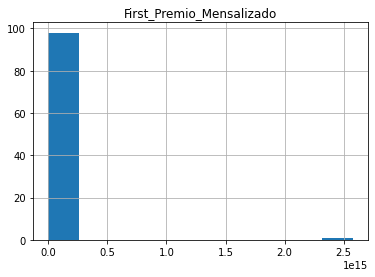

In [85]:
funenseg.hist(column='First_Premio_Mensalizado')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faff98501d0>]],
      dtype=object)

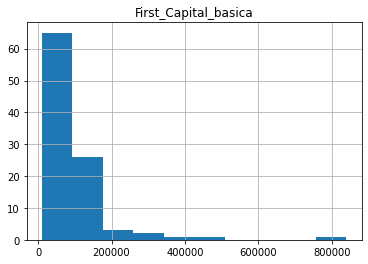

In [86]:
 funenseg.hist(column='First_Capital_basica')

In [ ]:
 funenseg.hist(column='First_Capital_basica')

Da pra ver que a grande maioria tem capital e premio basico sendo 0,01...


In [97]:
#Vamos ver os que não são 0.01
funenseg_corretos = funenseg.loc[funenseg['First_Premio_Mensalizado'] > 1]
print(funenseg_corretos.shape)
funenseg_corretos
#Apenas 9 linhas com premio mensalizado acima de 1... Checar com alguem oq esta acontecendo e se estes dados
#podem ser deletados da base. 

(9, 61)


,Protocolo,Cod_ramo,Cod_produto,Cod_plano,Cod_Convenio,Apolice,CPF,Non_Taken,Dt_nasc,Inicio_vigencia_apolice_ajustado,Dt_protocolo_ajustado,Dt_emissao_ajustado,Dt_baixa_min_ajustado,Cancelamento_apolice_ajustado,Produto,Plano,Status,Motivo_cancelamento,Sexo,Estado_civil,Ocupacao,Cidade,Estado,CanalMetlife,CanalVenda,Last_CNPJ_favorecido,Last_Nome_favorecido,First_Premio_Mensalizado,First_Capital_basica,First_Premio_Mensalizado_IPCA,First_Capital_basica_IPCA,First_Broker,First_Broker_CNPJ,cnpjla,cnpjlu,Agencia,la,lu,consultorajustado,cnpjla_Venda,cnpjlu_Venda,Agencia_Venda,la_Venda,lu_Venda,dt_cad_Ajustado,dt_descad_Ajustado,FormaPGTO_Inicial,FormaPGTO_Final,FormaPGTO_Inicial_Detalhe,FormaPGTO_Final_Detalhe,IdadeContratacao,TempoMetlifeConsultorVenda,ProdutoResumido,RangeAgentTenureSale,RangeFirstPremium,RangeAgeAtSale,Motivo_cancelamento_Resumo,PolicyCancel_AgentTenure,RangePolicyCancel_AgentTenure,FirstPaymentFrequency,#FirstPaymentFrequency
707,S170001332,91,10745,8748,1170308.0,24292,15155239850,0,1975-11-21,2017-03-01,2017-03-01,2017-03-01,2017-04-01,2018-11-01,VIDA SEGURA Canal A II,PV 75,C,Falta de pagamento,M,Solteiro,NaN,SAO PAULO,SP,Agents,CanalA,4.216169e+13,Fundacao Escola Nacional de Segs FUNENS,4.763200e+02,149147.00,552.06,172863.41,NULL - FUNENSEG,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,2016-07-01,2016-06-01,CARTAO DE CREDITO,CARTAO DE CREDITO,VISA,VISA,41.0,9.0,TL + Pension,2) 7-12 months,2) 301-500,3) 41-50,Involuntary,29.0,4) Y3+,1) Monthly,1
3098,S190001886,91,10824,9696,1447940.0,37044,563428376,0,1984-05-12,2019-02-01,2019-02-01,2019-02-01,2019-02-01,2019-09-01,Broker - VIDA SEGURA Seguralta HO,VS 25,C,Falta de pagamento,M,Casado,NaN,São Luís,MA,Broker,Parceria Broker - Seguralta,2.671673e+12,SGA CORRETORA DE SEGUROS LTDA,6.181400e+02,400000.00,673.41,435767.32,NULL - FUNENSEG,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,2016-07-01,2016-06-01,CARTAO DE CREDITO,CARTAO DE CREDITO,American Express,American Express,34.0,NaN,TL,N/I,3) 501-700,2) 31-40,Involuntary,NaN,N/I,1) Monthly,1
5567,S150001518,91,10566,8186,993883.0,20667,9939570724,0,1984-02-23,2015-08-01,2015-08-01,2015-08-01,2015-09-01,2018-02-01,MAIS PROTEÇÃO,MP,C,Falta de pagamento,F,Solteiro,NaN,RIO DE JANEIRO,RJ,Agents,Consultores,4.216169e+13,NULL - FUNENSEG,3.390000e+01,280263.00,43.57,360222.20,NULL - FUNENSEG,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,NaT,NaT,CARTAO DE CREDITO,CARTAO DE CREDITO,VISA,VISA,31.0,NaN,CI,N/I,1) 0-300,2) 31-40,Involuntary,NaN,N/I,1) Monthly,1
11935,S120000225,91,10382,6407,895746.0,15159,66972973015,1,1972-06-06,2012-10-01,2012-10-01,2012-10-01,NaT,2012-11-01,VIDA TOTAL,VT 100,C,Solicitação,F,NaN,NaN,Sao Paulo,SP,Agents,Consultores,4.216169e+13,Fundacao Escola Nacional de Segs FUNENS,5.928490e+07,100000.00,935.67,157825.77,NULL - FUNENSEG,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,NaT,NaT,BOLETO,DEBITO EM C/C,BOLETO,Banco Santander (Brasil) S.A.,40.0,NaN,WL,N/I,3) 501-700,2) 31-40,Voluntary,NaN,N/I,1) Monthly,1
12080,S120000063,91,10382,6407,894686.0,15038,29443257874,1,1980-12-21,2012-09-01,2012-09-01,2012-09-01,NaT,2012-11-01,VIDA TOTAL,VT 100,C,Solicitação,M,NaN,NaN,Santo Andre,SP,Agents,Consultores,4.216169e+13,Fundacao Escola Nacional de Segs FUNENS,5.225608e+07,100000.00,829.44,158725.38,NULL - FUNENSEG,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,NaT,NaT,DEBITO EM C/C,DEBITO EM C/C,Itaú Unibanco S.A.,Itaú Unibanco S.A.,31.0,NaN,WL,N/I,3) 501-700,2) 31-40,Voluntary,NaN,N/I,1) Monthly,1
39200,S120000003,91,10382,6407,894042.0,15000,6579200880,0,1968-07-24,2012-09-01,2012-08-01,2012-09-01,2012-09-01,2014-02-01,VIDA TOTAL,VT 100,C,Solicitação,M,Casado,NaN,São Paulo,SP,Agents,Consultores,4.216169e+13,NULL - FUNENSEG,3.887110e+05,10670.00,61.70,16936.00,NULL - FUNENSEG,4.216169e+13,NaN,NaN,NaN,NaN,NaN,FUNENSEG,NaN,NaN,NaN,NaN,NaN,NaT,NaT,DEBITO EM C/C,CARTAO DE CREDITO,NaN,Mastercard,44.0,NaN,WL,N/I,1) 0-300,3) 41-50,Volunt